In [1]:
import numpy as np
from algorithms.adaboost import (
    AdaBoostClassifier,
    train_test_split,
    accuracy,
    plot_alpha_curve,
    plot_decision_boundary,
)

np.random.seed(2)
A = np.random.randn(70, 2) * 0.55 + [1.5, 1.5]
B = np.random.randn(65, 2) * 0.6 + [5.0, 4.5]
X = np.vstack([A, B])
y = np.array([-1] * len(A) + [1] * len(B))

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_ratio=0.3)

Iter 1    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 2    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 3    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 4    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 5    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 6    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 7    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 8    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 9    feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 10   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 11   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 12   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 13   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 14   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 15   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 16   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 17   feat=0  thr=2.903  pol=-1  err=0.000  α=10.362
Iter 18   feat=0  thr=2.903  po

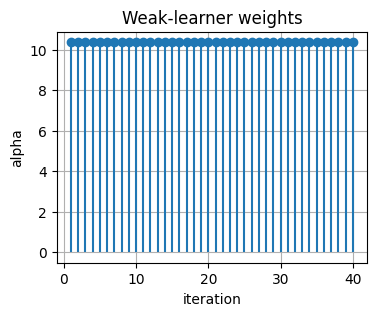

In [2]:
ada = AdaBoostClassifier(n_estimators=40, learning_rate=1.0, verbose=True).fit(
    X_tr, y_tr
)
plot_alpha_curve(ada)

Train acc: 1.0
Test  acc: 1.0


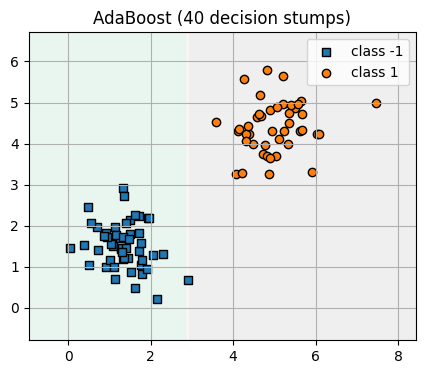

In [3]:
print("Train acc:", ada.score_accuracy(X_tr, y_tr).round(3))
print("Test  acc:", ada.score_accuracy(X_te, y_te).round(3))

plot_decision_boundary(ada, X_tr, y_tr, title="AdaBoost (40 decision stumps)")

In [4]:
new_pt = np.array([[3.0, 3.5]])
prob = ada.predict_proba(new_pt)[0]
print(f"P(y=+1 | x) = {prob:.2%}")

P(y=+1 | x) = 100.00%
